In [2]:
import pandas as pd

df = pd.read_csv('./data/neo.csv')

In [3]:
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
df['orbiting_body'].value_counts()

orbiting_body
Earth    90836
Name: count, dtype: int64

# 1) Data preprocesing and EDA

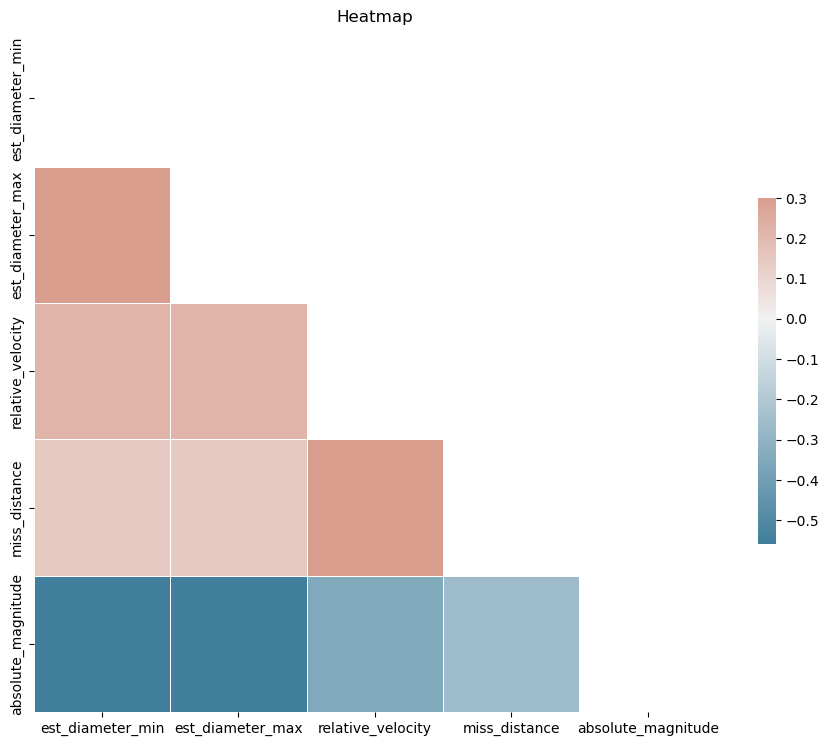

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcula la matriz de correlación

numeric_data = df.select_dtypes('float')

corr = numeric_data.corr()

# Crea una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configura la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Genera un mapa de color divergente personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibuja el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap')
plt.show()

c:\Users\david\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


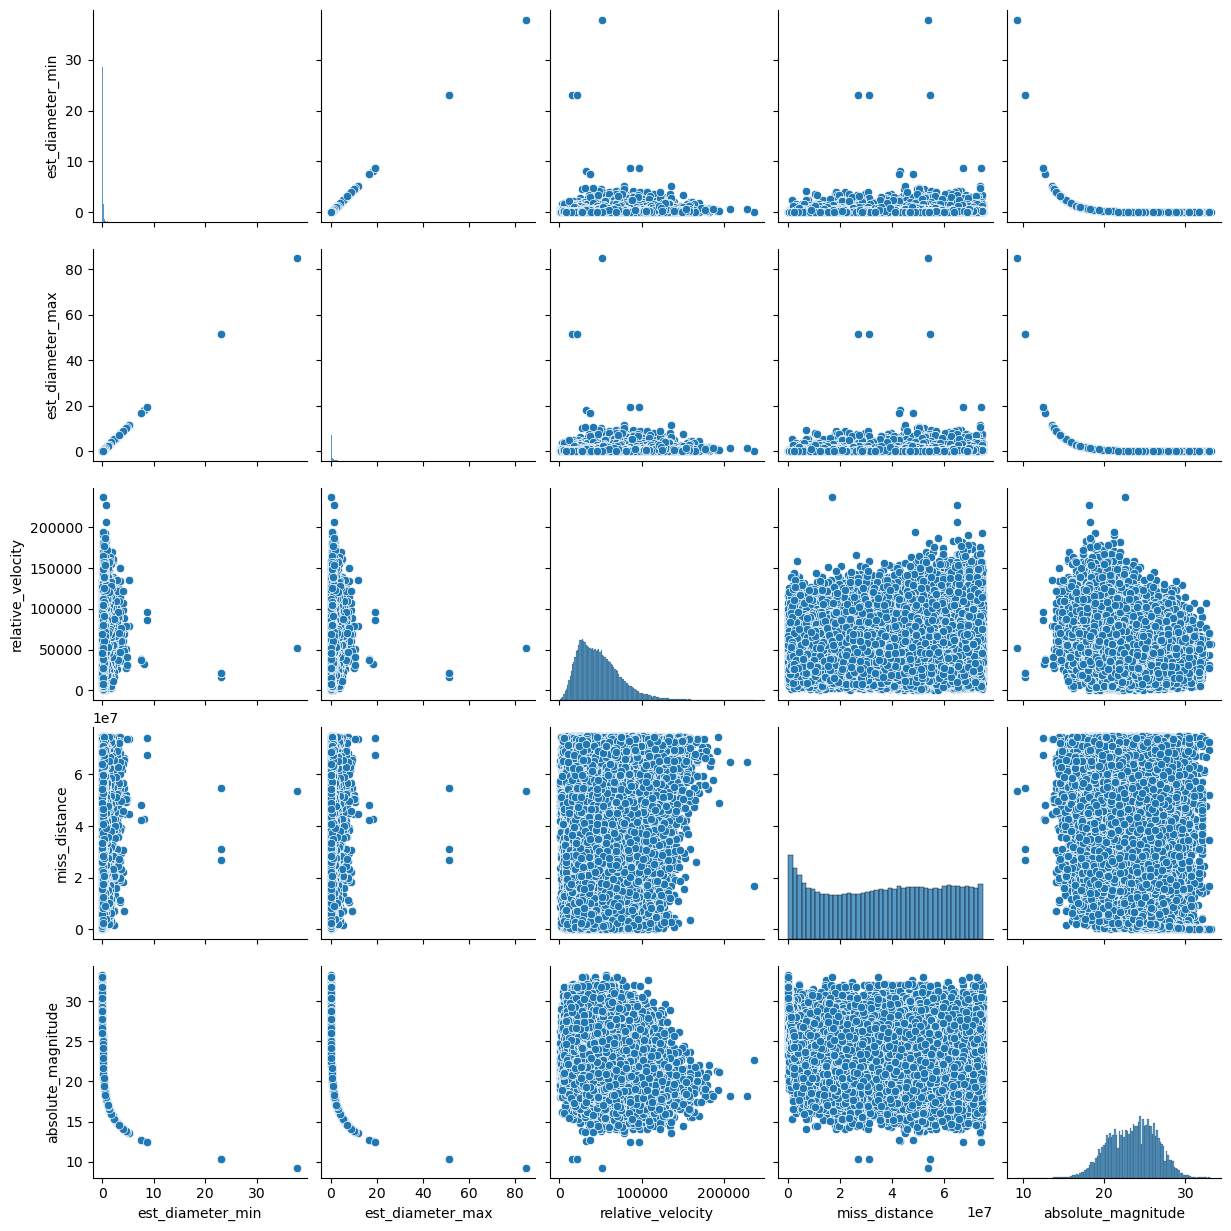

In [6]:
# Crear los gráficos de dispersión
sns.pairplot(numeric_data)

# 2) Feature Engineering

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(numeric_data)

# 3) Models

In [8]:
from sklearn.manifold import TSNE

embedding = TSNE(n_components=2,
        init="pca",
        n_iter=500,
        n_iter_without_progress=150,
        perplexity=10,
        random_state=0)


e_data = embedding.fit_transform(scaled_features)

C:\Users\david\AppData\Local\Temp\ipykernel_17104\2181789850.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=e_data[:, 0], y=e_data[:, 1], palette=sns.color_palette('hls', num_clusters))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


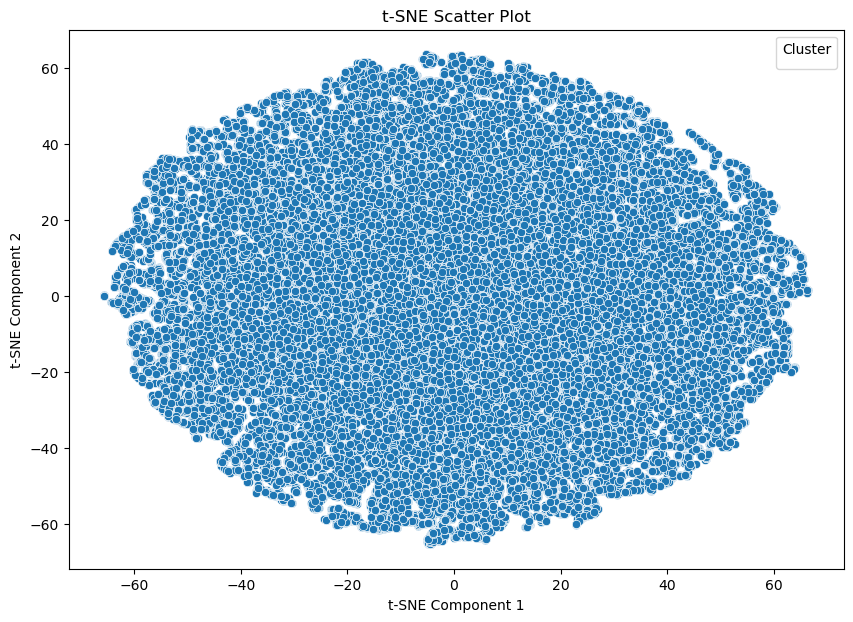

In [11]:
# Crear una figura y un conjunto de subtramas
plt.figure(figsize=(10, 7))

# Dibujar un gráfico de dispersión
sns.scatterplot(x=e_data[:, 0], y=e_data[:, 1], palette=sns.color_palette('hls', num_clusters))

# Establecer el título y las etiquetas del gráfico
plt.title('t-SNE Scatter Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Mostrar leyenda y gráfico
plt.legend(title='Cluster')
plt.show()

In [9]:
from sklearn.cluster import KMeans

num_clusters = 3

# Inicializar y ajustar K-Means con los datos
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(e_data)

# Los clústeres asignados para cada punto de datos están disponibles en kmeans.labels_
clusters = kmeans.labels_

# Si deseas agregar estas etiquetas de clúster de vuelta a tu dataframe original
df['cluster'] = clusters

c:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


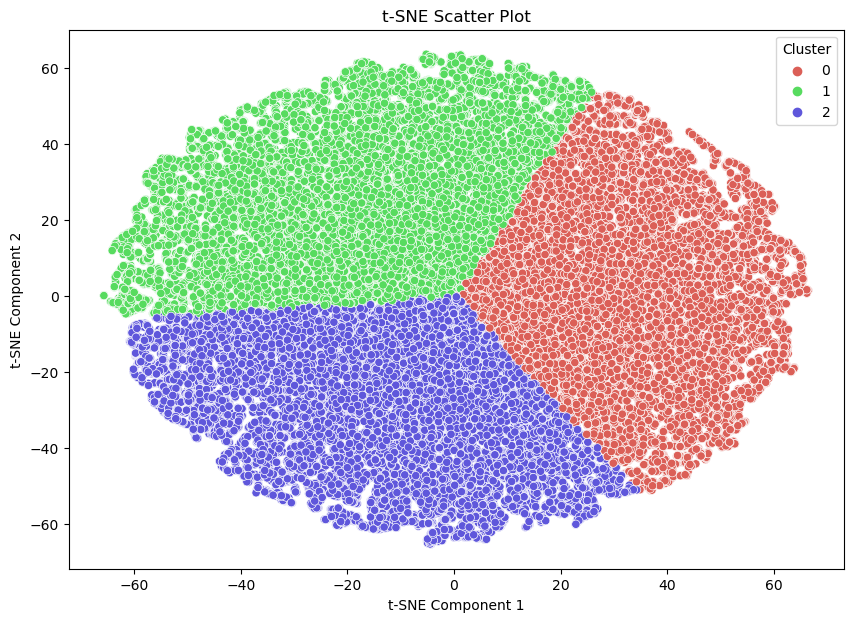

In [12]:
# Crear una figura y un conjunto de subtramas
plt.figure(figsize=(10, 7))

# Dibujar un gráfico de dispersión
sns.scatterplot(x=e_data[:, 0], y=e_data[:, 1],hue=clusters, palette=sns.color_palette('hls', num_clusters))

# Establecer el título y las etiquetas del gráfico
plt.title('t-SNE Scatter Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Mostrar leyenda y gráfico
plt.legend(title='Cluster')
plt.show()

In [43]:
from sklearn.cluster import KMeans

num_clusters = 10

# Inicializar y ajustar K-Means con los datos
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(e_data)

# Los clústeres asignados para cada punto de datos están disponibles en kmeans.labels_
clusters = kmeans.labels_

# Si deseas agregar estas etiquetas de clúster de vuelta a tu dataframe original
df['cluster'] = clusters

c:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


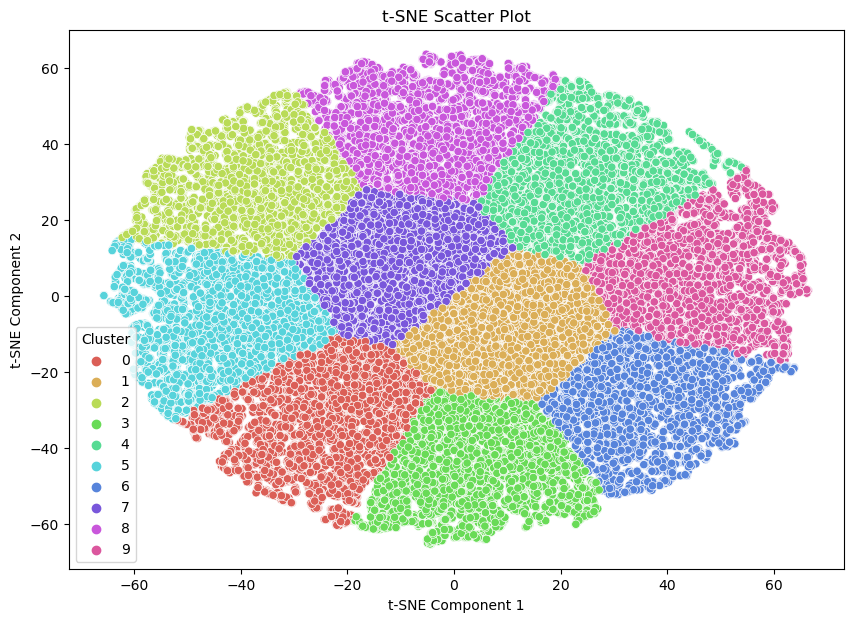

In [44]:
# Crear una figura y un conjunto de subtramas
plt.figure(figsize=(10, 7))

# Dibujar un gráfico de dispersión
sns.scatterplot(x=e_data[:, 0], y=e_data[:, 1],hue=clusters, palette=sns.color_palette('hls', num_clusters))

# Establecer el título y las etiquetas del gráfico
plt.title('t-SNE Scatter Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Mostrar leyenda y gráfico
plt.legend(title='Cluster')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score
import numpy as np


labels = clusters

# Calculando el Coeficiente de Silueta
silhouette_avg = silhouette_score(e_data, labels)

print(f"El Coeficiente de Silueta promedio es: {silhouette_avg}")

El Coeficiente de Silueta promedio es: 0.33180224895477295


In [39]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=1.5, min_samples=25)
cluster.fit(e_data)
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 5 clusters and 75 points of noise.


C:\Users\david\AppData\Local\Temp\ipykernel_17104\992391530.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('brg', n_labels)


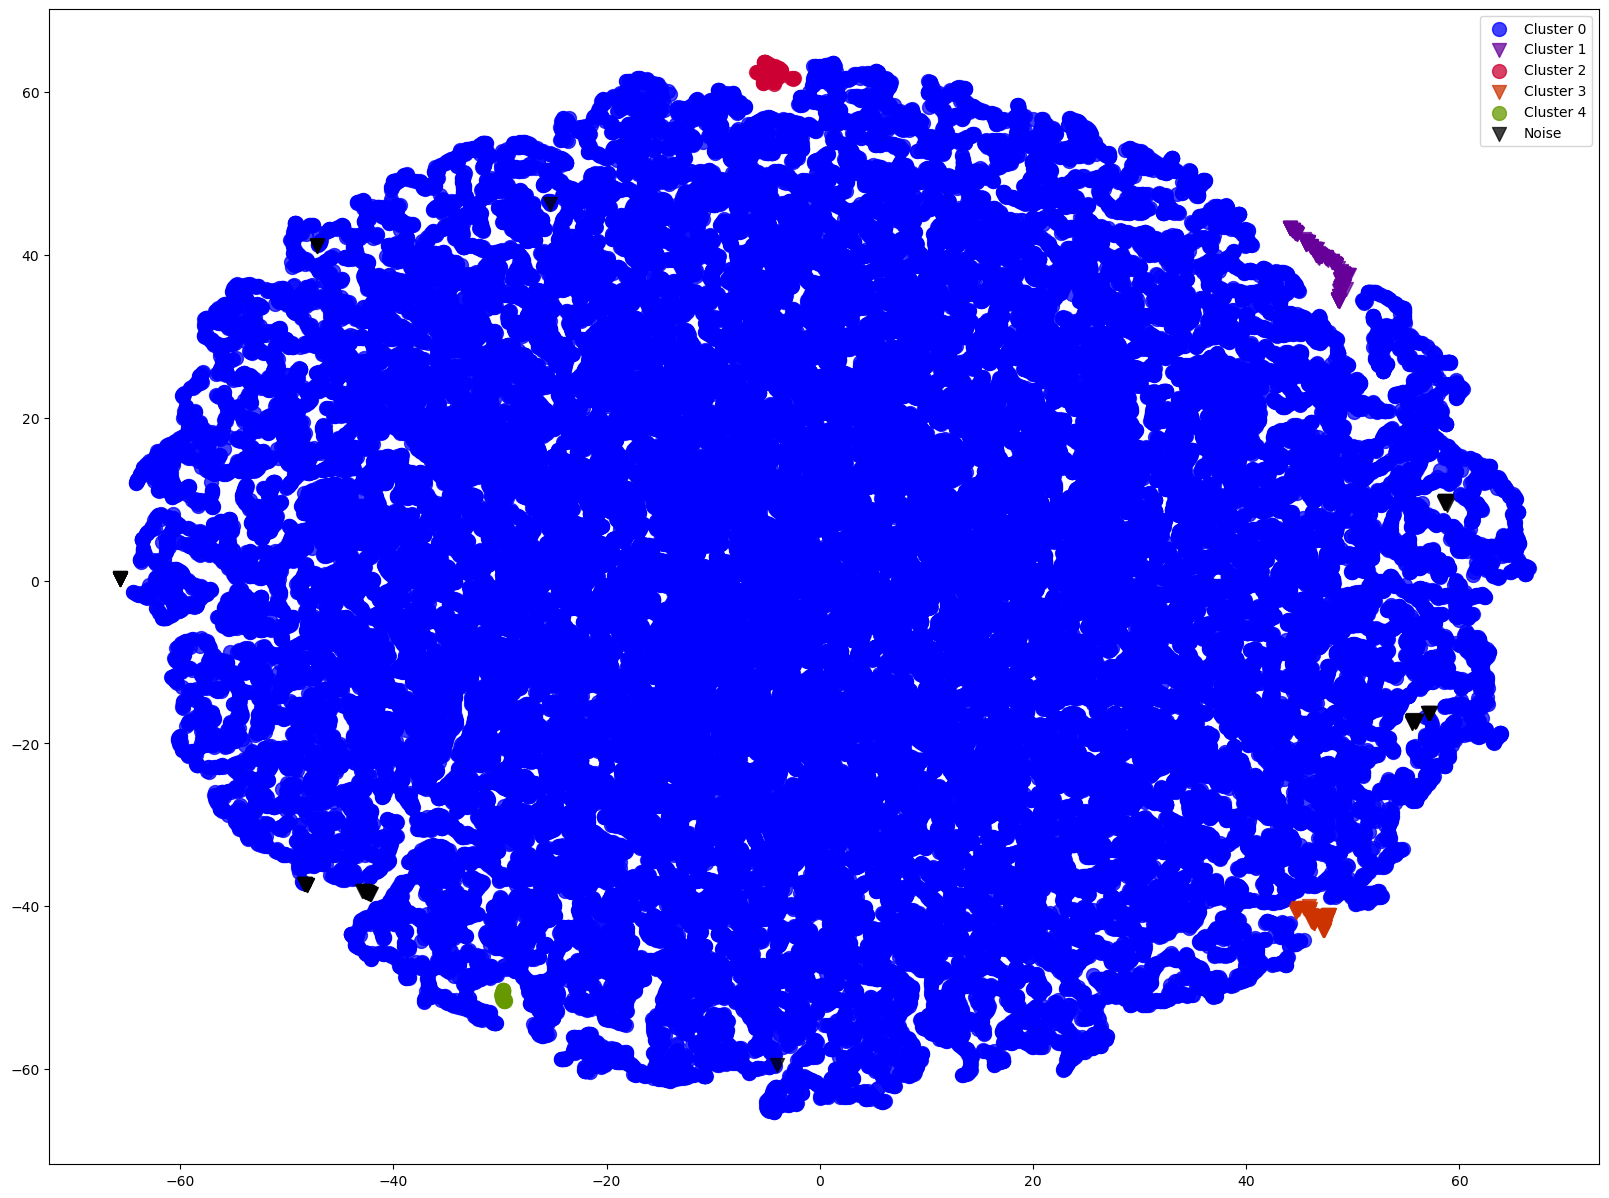

In [33]:
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        e_data[cluster.labels_ == l, 0],
        e_data[cluster.labels_ == l, 1],
        c=[cmap(l) if l >= 0 else 'Black'],
        marker='ov'[l%2],
        alpha=0.75,
        s=100,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [40]:
unique, counts = np.unique(cluster.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 75, 0: 90417, 1: 168, 2: 82, 3: 62, 4: 32}


In [42]:
from sklearn.metrics import silhouette_score
import numpy as np


labels = cluster.labels_

# Calculando el Coeficiente de Silueta
silhouette_avg = silhouette_score(e_data, labels)

print(f"El Coeficiente de Silueta promedio es: {silhouette_avg}")

El Coeficiente de Silueta promedio es: -0.2908601760864258
